In [1]:
import sys

import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd

import networkx as nx

import shapely as sh
from shapely import geometry

import utilities.common as uc
import utilities.global_parameters as ug

import utilities.get_random_city as grc

import utilities.get_graph as gg
import utilities.forge_graph as fg
import utilities.visualise_graph as vg
import utilities.get_route as gr

random.seed(0)

%load_ext autoreload
%autoreload 2

INFO: 2020-01-09 08:27:32,617: get_random_city.py: 102:
	881 segments
	157 one-way
	362 two-way


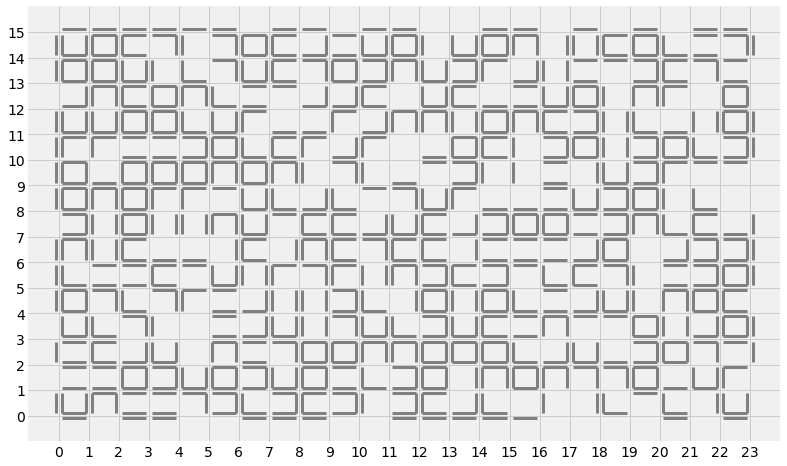

In [2]:
# Make random city. Create a list of dicts — one dict to describe one street segment.
# segment_id  unique id (int)
# direction (int)
#     0 — no_way
#     1 — one_way_direct
#     2 — one_way_reverse
#     3 — two_way
# coordinates start and end point of a segment (list of tuples)
# geometry    segment geometry (shapely linestring)
random_city = grc.get_random_city(
    city_size=(24, 16),
    frequencies=(0.3, 0.1, 0.1, 0.5)
#     city_size=[2, 2],
#     frequencies=[0., 0., 0., 1.]
    )
grc.plot_area(random_city)

INFO: 2020-01-09 08:27:34,702: visualise_graph.py: 119:
	nodes #: 330
	edges #: 799
	strongly connected: True
	disconnected nodes: 0	dead ends:55



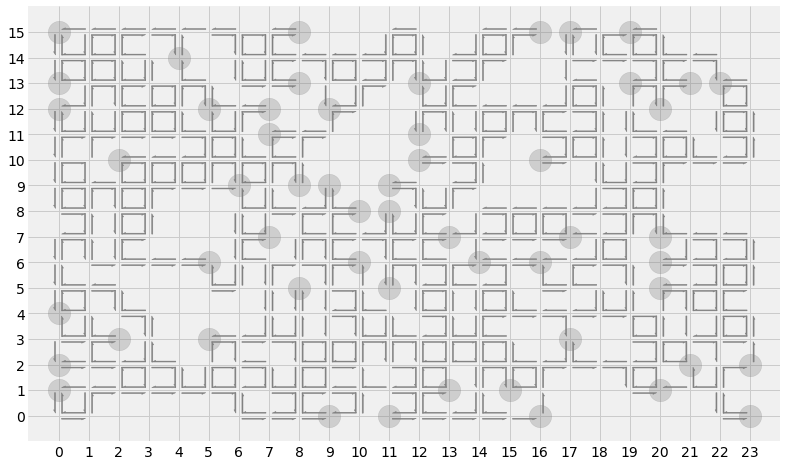

In [3]:
# Get a naive graph for a city.
# Naive graph is a directed graph,
# where nodes are cross-road coordinates (e.g. (0, 0)),
# i.e. one node can have up to 4 in-coming and 4 out-going edges.
naive_g = gg.get_naive_graph(random_city)
vg.visualise_naive_graph(naive_g)

INFO: 2020-01-09 08:27:36,265: visualise_graph.py: 229:
	nodes #: 1598
	edges #: 2880
	strongly connected: True
	disconnected nodes: 0
	straight drives: 1263
	right turns: 461
	left turns: 474
	u-turns: 682
	dead ends: 52


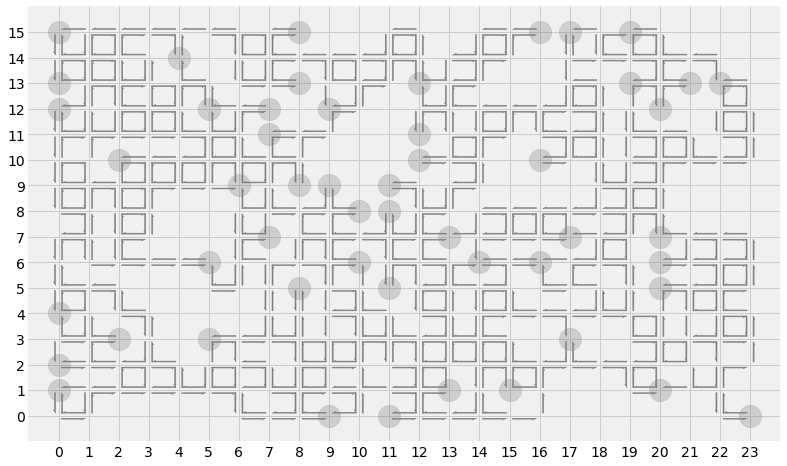

In [4]:
# Get a manoeuvre graph for a city.
# Manoeuvre graph is a directed graph,
# where nodes are the ends of a street segment,
# such that for a two-way street segment X
# the nodes for one way will be X_t, X_h and for the opposite way -X_t, and -X_h.
# There are two types of edges in manoeuvre graph: segment edges and monoeuvre edges.
# Segment edges simply describe a street segment; such edges attributes read 'go_straight';
# such edges are shown in visualisation.
# Manoeuvre edges describe a transition from one segment to another;
# such edge attribute can read anything from {turn_right, make_u_turn, turn_left, go_straight};
# such edges are NOT shown in visualisation.
manoeuvre_g = gg.get_manoeuvre_graph(random_city)

vg.visualise_manoeuvre_graph(manoeuvre_g)

INFO: 2020-01-09 08:27:37,527: forge_graph.py: 278:
	removed 40 nodes
INFO: 2020-01-09 08:27:37,560: visualise_graph.py: 229:
	nodes #: 1518
	edges #: 2760
	strongly connected: False
	disconnected nodes: 8
	straight drives: 1183
	right turns: 461
	left turns: 474
	u-turns: 642
	dead ends: 52


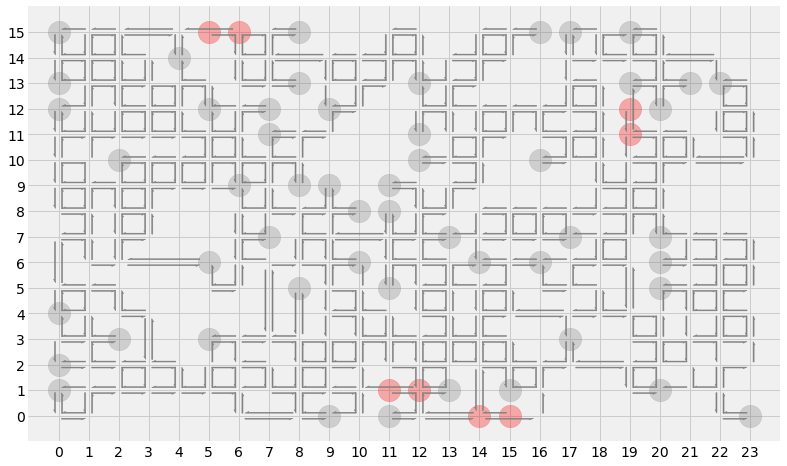

In [5]:
manoeuvre_g = fg.join_split_edges(manoeuvre_g)
vg.visualise_manoeuvre_graph(manoeuvre_g)

In [6]:
# district_g = gg.get_random_district_graph(manoeuvre_g)
# vg.visualise_manoeuvre_graph(district_g)

In [7]:
# district_g = fg.add_connecting_grafts(
#     district_g,
#     manoeuvre_g)
# vg.visualise_manoeuvre_graph(district_g)

In [8]:
# district_g = fg.remove_single_nodes(
#     district_g)
# vg.visualise_manoeuvre_graph(district_g)

INFO: 2020-01-09 08:27:40,369: visualise_graph.py: 229:
	nodes #: 799
	edges #: 2081
	strongly connected: True
	disconnected nodes: 0
	straight drives: 464
	right turns: 461
	left turns: 474
	u-turns: 682
	dead ends: 2
INFO: 2020-01-09 08:27:41,022: visualise_graph.py: 229:
	nodes #: 1518
	edges #: 2760
	strongly connected: False
	disconnected nodes: 8
	straight drives: 1183
	right turns: 461
	left turns: 474
	u-turns: 642
	dead ends: 52


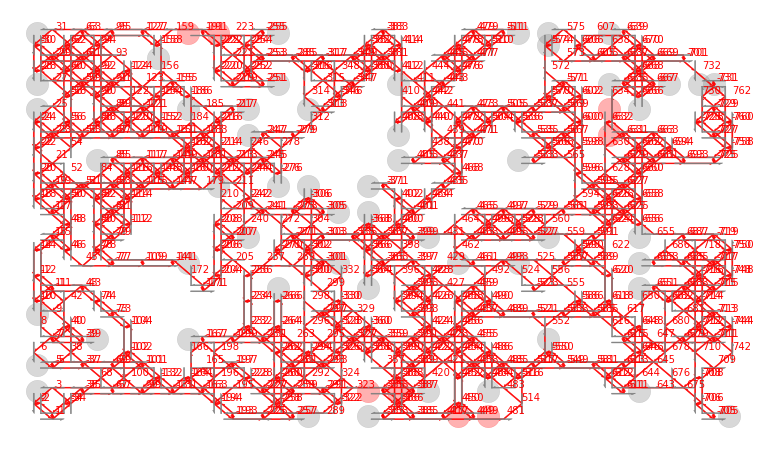

In [9]:
inverted_g = gg.get_inverted_graph(random_city)
vg.visualise_inverted_graph(inverted_g, manoeuvre_g)
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682

In [10]:
# INFO: 2020-01-09 08:20:04,211: visualise_graph.py: 229:
# 	nodes #: 799
# 	edges #: 2081
# 	strongly connected: True
# 	disconnected nodes: 0
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682
# 	dead ends: 2
# INFO: 2020-01-09 08:20:04,804: visualise_graph.py: 229:
# 	nodes #: 1518
# 	edges #: 2760
# 	strongly connected: False
# 	disconnected nodes: 8
# 	straight drives: 1183
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 642
# 	dead ends: 52

In [11]:
# inverted_district_g = gg.get_random_district_g(inverted_g)
# vg.visualise_inverted_g(inverted_district_g)

In [12]:
# inverted_district_g = fg.add_connecting_grafts(
#     inverted_district_g,
#     inverted_g)
# vg.visualise_inverted_g(inverted_district_g)

In [13]:
inverted_g = fg.prune_u_turns(inverted_g)
inverted_g = fg.prune_left_turns(inverted_g)
# inverted_g = fg.prune_right_turns(inverted_g)

INFO: 2020-01-09 08:27:57,584: visualise_graph.py: 229:
	nodes #: 799
	edges #: 1119
	strongly connected: True
	disconnected nodes: 0
	straight drives: 464
	right turns: 461
	left turns: 117
	u-turns: 77
	dead ends: 31
INFO: 2020-01-09 08:27:58,047: visualise_graph.py: 229:
	nodes #: 1518
	edges #: 2760
	strongly connected: False
	disconnected nodes: 8
	straight drives: 1183
	right turns: 461
	left turns: 474
	u-turns: 642
	dead ends: 52


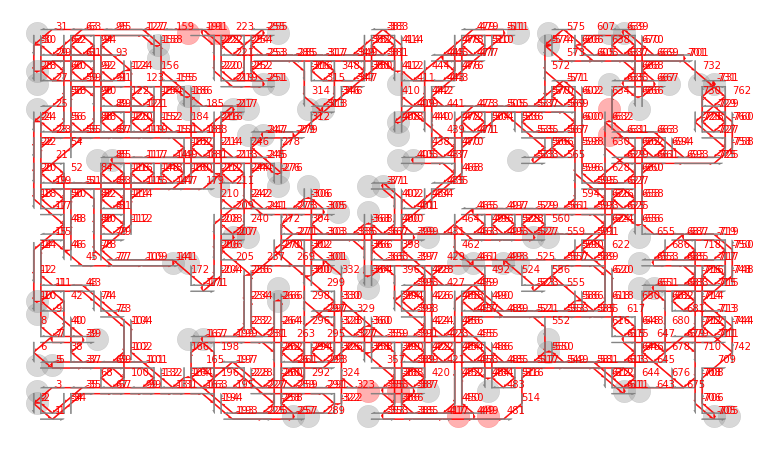

In [14]:
vg.visualise_inverted_graph(inverted_g, manoeuvre_g)

In [15]:
# INFO: 2020-01-09 08:20:21,202: visualise_graph.py: 229:
# 	nodes #: 799
# 	edges #: 1119
# 	strongly connected: True
# 	disconnected nodes: 0
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 117
# 	u-turns: 77
# 	dead ends: 31
# INFO: 2020-01-09 08:20:21,690: visualise_graph.py: 229:
# 	nodes #: 1518
# 	edges #: 2760
# 	strongly connected: False
# 	disconnected nodes: 8
# 	straight drives: 1183
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 642
# 	dead ends: 52

In [16]:
g = inverted_g.copy()

In [17]:
virtual_g = inverted_g.copy()

In [18]:
virtual_g = fg.balance_graph_iteratively(inverted_g)

INFO: 2020-01-09 08:28:01,689: forge_graph.py: 394:
	nodes # 799
	edges # 1119
	IMBALANCED NODES:
	excess ins # 187
	excess outs # 189

INFO: 2020-01-09 08:28:07,004: forge_graph.py: 433:
	virtual edges # 187

INFO: 2020-01-09 08:28:07,008: forge_graph.py: 394:
	nodes # 799
	edges # 1306
	IMBALANCED NODES:
	excess ins # 8
	excess outs # 8

INFO: 2020-01-09 08:28:07,016: forge_graph.py: 433:
	virtual edges # 8

INFO: 2020-01-09 08:28:07,025: forge_graph.py: 451:
	added 195 edges over 2 cycles



In [19]:
# INFO: 2020-01-09 08:20:25,162: forge_graph.py: 393:
# 	nodes # 799
# 	edges # 1119
# 	IMBALANCED NODES:
# 	excess ins # 187
# 	excess outs # 189

# INFO: 2020-01-09 08:20:30,638: forge_graph.py: 432:
# 	virtual edges # 187

# INFO: 2020-01-09 08:20:30,642: forge_graph.py: 393:
# 	nodes # 799
# 	edges # 1306
# 	IMBALANCED NODES:
# 	excess ins # 8
# 	excess outs # 8

# INFO: 2020-01-09 08:20:30,651: forge_graph.py: 432:
# 	virtual edges # 8

# INFO: 2020-01-09 08:20:30,660: forge_graph.py: 450:
# 	added 195 edges over 2 cycles

In [20]:
virtual_circuit = gr.get_virtual_path(virtual_g)

In [21]:
real_circuit = gr.get_real_path(
    virtual_circuit,
    inverted_g,
    virtual_g)

INFO: 2020-01-09 08:28:07,190: get_route.py: 47:
	eulerian circuit length 3848



In [22]:
real_circuit

{'circuit_by_edge': [(1, 34),
  (34, 35),
  (35, 67),
  (67, 99),
  (99, 131),
  (131, 163),
  (163, -194),
  (-194, 193),
  (193, 225),
  (225, 257),
  (257, -257),
  (-257, -225),
  (-225, -193),
  (-193, 194),
  (194, -163),
  (-163, 164),
  (164, 165),
  (165, 197),
  (197, -228),
  (-228, 227),
  (227, 259),
  (259, 291),
  (291, -322),
  (-322, 322),
  (322, 324),
  (324, 326),
  (326, 327),
  (327, -358),
  (-358, 358),
  (358, 360),
  (360, 329),
  (329, 330),
  (330, 332),
  (332, -301),
  (-301, 302),
  (302, 303),
  (303, 335),
  (335, -366),
  (-366, -364),
  (-364, 364),
  (364, 365),
  (365, 397),
  (397, 429),
  (429, 461),
  (461, 492),
  (492, -490),
  (-490, -457),
  (-457, 458),
  (458, 459),
  (459, -490),
  (-490, 489),
  (489, 521),
  (521, 553),
  (553, 585),
  (585, 617),
  (617, -648),
  (-648, -615),
  (-615, 616),
  (616, 618),
  (618, 620),
  (620, -589),
  (-589, -557),
  (-557, 525),
  (525, -493),
  (-493, -461),
  (-461, 461),
  (461, 492),
  (492, -490)